In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from matplotlib import cm

In [2]:
import algo

In [53]:
ww = float(input("entrez valeur de omega [0..100] "))
eps = float(input("entrez valeur de epsilon [0..15] "))

ZoomX = float(input("entrez valeur de l'intervale x [0..10]"))
ZoomY = float(input("entrez valeur de l'intervale |y| [0..10]"))

y0 = float(input("entrez valeur de y0 ["+ str(-ZoomY)+".."+str(ZoomY)+"] "))
T = float(input("entrez la valeur de l'ouverture de la fente [0..1]"))

a = float(input("entrez valeur de a [-40..-1] "))
b = float(input("entrez valeur de b [1..40] "))
p = int(input("diviser en p intervale [10..100] "))

eps = complex(0,eps)

entrez valeur de omega [0..100] 12
entrez valeur de epsilon [0..15] 0.1
entrez valeur de l'intervale x [0..10]5
entrez valeur de l'intervale |y| [0..10]2
entrez valeur de y0 [-2.0..2.0] 0
entrez la valeur de l'ouverture de la fente [0..1]0.02
entrez valeur de a [-40..-1] -30
entrez valeur de b [1..40] 30
diviser en p intervale [10..100] 50


In [54]:
dx = 0.01
dy = 0.01
listX = np.arange(dx,ZoomX+dx*0.5,dx)
listY = np.arange(-ZoomY,ZoomY+dy*0.5,dy)

In [55]:
const = ww**2+eps
div_pi_mult_T = 1./np.pi * T


resGauss = np.zeros((len(listX),len(listY)),dtype=complex) 

for ix,x in enumerate(listX):
    resy = [] 
    myf = lambda xi :np.sinc(xi*T)*np.exp(1.0j*(listX[ix]*np.sqrt(const-xi**2) + xi*(listY-y0)))
    
    resQuadGauss = algo.quadGauss(a,b,p,myf)
    
    resGauss[ix,:] =  resQuadGauss
    

resGauss = div_pi_mult_T * np.array(resGauss).T

Text(0.5, 0.98, 'omega = 12.0 epsilon = 0.1 a = -30.0 b = 30.0 ouverture 0.02')

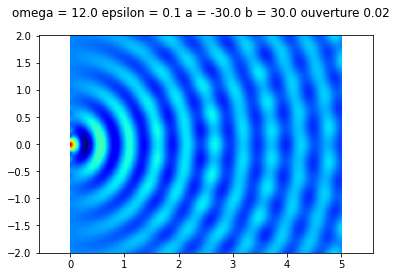

In [56]:
ptX,ptY = np.meshgrid(listX,listY)

fig, axs = plt.subplots(nrows=1,ncols=1)


axs.pcolor(ptX,ptY,np.real(resGauss),cmap = cm.jet)
axs.axis('equal')

fig.suptitle("omega = "+str(ww)+" epsilon = "+str(np.abs(eps))+" a = "+str(a)+" b = "+str(b)+" ouverture "+str(T))

In [57]:
sauve = str(input("sauver le graphe ? [oui/non]"))

if sauve == "oui" :
    import os
    my_path = os.path.abspath("../../rapport/images/1F/")
    titre = "omega = "+str(ww)+" epsilon = "+str(np.abs(eps))+" zoomX = "+str(ZoomX)+" zoomY = "+str(ZoomY)+".png"
    fig.savefig(os.path.join(my_path, titre))

sauver le graphe ? [oui/non]oui
